In [10]:
from SQsearch import RisingLimb, FallingLimb
from farPoint import SDRCurves, bcdPoints
from ana_new import trans_ana
from two_step import two_step_overland
from steady_fit import fit_steady
import numpy as np
import pickle
import bezeir_fit as bf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from math import sqrt

# Rise = RisingLimb(rec_name='ks1', folder='Steady_fit')
# Fall = FallingLimb(rec_name='ks1', folder='Steady_fit')

SDR = SDRCurves(100.0, 201, 0.5, 0.1, 0.01, 2, 4, useFile='ks1_SDRrec.pick')

ie0 = 18.0
ie1 = 57.0
ie2 = 22.0
ToC = 356.

ca = two_step_overland(ie0, ie1, ie2, 100.0, 201, 0.5, 0.1, 0.01)
ca.ie1_duration(ToC)
ca.run()

alpha = 1./0.1*sqrt(0.01)
m = 5./3
i1 = ie1/3600.0/1000
q1 = i1*100.0
S1 = m/(m+1)*alpha/i1*(i1*100.0/alpha)**((m+1)/m)

SDC = bcdPoints(ca)
SDC = np.array(SDC[0])

qBi1 = SDC[0][1]/q1
SBi1 = SDC[0][2]/S1
qDi1 = SDC[-1][1]/q1
SDi1 = SDC[-1][2]/S1

curve, t = SDR.interpCurve([qBi1, SBi1, qDi1, SDi1])
curve[:, 0] = curve[:, 0]*q1
curve[:, 1] = curve[:, 1]*S1

ie0=18.00
ie1=57.00
ie2=22.00
ToC=356.00
[[ 0.97118013  0.68860729]
 [ 1.10344294  0.72436857]
 [ 1.05495303  0.71050302]
 [ 1.08355345  0.71031526]
 [ 1.19636457  0.91746207]
 [ 1.01875244  0.66217705]
 [ 1.21471768  0.82479448]
 [ 0.9750789   0.94421779]
 [ 0.95574039  0.90269344]
 [ 1.22769041  0.81352435]]
(0.56018406485717487, 0.5908995089251553)


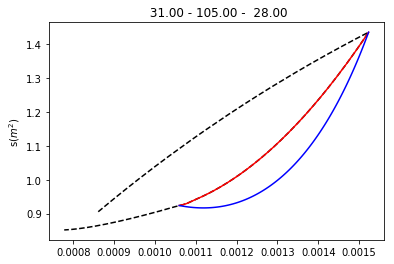

In [9]:
plt.figure
plt.plot(ca.q_curve[:, 1], ca.s_curve[:, 1], '--k')
plt.plot(SDC[:, 1], SDC[:, 2], '-r')
plt.plot(curve[:, 0], curve[:, 1], '-b')

title = '%6.2f' % ie0 + ' - ' + '%6.2f' % ie1 + ' - ' + '%6.2f' % ie2
plt.title(title)
# X_LABEL = '$q_B/qD$ = %8.4f' % qBD + '   ' + '$s_B/s_D$ = %8.4f' % sBD +'\n q($m^2/s$)'
# plt.xlabel(X_LABEL)
plt.ylabel('s($m^2$)')
plt.savefig('new_SDC_3.png', dpi=120)
plt.show()

In [ ]:
curve

In [ ]:
plt.figure
for i in range(1, 21):
    c1 = 1.01 + i*0.1
    curve, t = SDR.interpCurve(qBD, c1)
    plt.plot(curve[:, 0]*SDC[0][1], curve[:, 1]*SDC[0][2])
    plt.plot(ca.q_curve[:, 1], ca.s_curve[:, 1], '--k')
plt.show()

In [ ]:
curve

In [ ]:
SDi1